In [1]:
import sys
sys.path.append('..')
from utils.results import *

In [2]:
'''
IPython extension to reload modules before executing user code.
https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
'''
%load_ext autoreload
%autoreload 2

In [3]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [4]:
plt.style.use('seaborn-bright')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cfills = [matplotlib.colors.colorConverter.to_rgba(c, alpha=0.5) for c in colors]
markers = ['o', 'D', 's', 'X']
styles = {
    '0': dict(marker=markers[0], color=colors[0]),# cfill=cfills[0]),
    '1': dict(marker=markers[1], color=colors[1]),# cfill=cfills[1]),
    '2': dict(marker=markers[2], color=colors[2]),# cfill=cfills[2]),
    '3': dict(marker=markers[3], color=colors[3]),# cfill=cfills[3]),
    'in': dict(label='in-set categories', marker=markers[0], color=colors[0]),# cfill=cfills[0]),
    'out': dict(label='out-of-set categories', marker=markers[1], color=colors[1])}#, cfill=cfills[1])}

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

c0 = matplotlib.colors.colorConverter.to_rgba(colors[0], alpha=0.5)
c1 = matplotlib.colors.colorConverter.to_rgba(colors[1], alpha=0.5)

In [5]:
path_save = pathlib.Path('/Users/fbickfordsmith/Google Drive/Project/attention/data/figures/')

In [6]:
def scatter_line(ax, x, y, style):
    ax.scatter(x, y, **style)
    ax.vlines(x, ymin=0, ymax=y, color=style['color'])

In [7]:
def plot_change_acc(df, x):
    fig, ax = plt.subplots()
    scatter_line(ax, x, df['acc_change_in'], styles['in'])
    scatter_line(ax, x, df['acc_change_out'], styles['out'])
    plt.ylabel('Accuracy change')
    plt.legend(title='Source of test examples')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    return fig, ax

### Semantic contexts

In [8]:
sem_labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
sem_labels_plot = ['', 'kitchen\nitems', 'dogs', 'cats', 'wearable\nitems', 'land\ntransport', 'birds']
df_sem = context_summary(type_context='sem', version_wnids=2, version_weights=9)
df_sem.insert(0, 'label', sem_labels)
df_sem

,label,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,kitchen,35,0.446404,0.512884,0.650968,0.670401,0.527051,0.157517,-0.123917,92
1,dogs,129,0.553892,0.661100,0.643919,0.684884,0.621002,0.023784,-0.022917,31
2,cats,13,0.854177,0.708477,0.645314,0.782407,0.582139,0.073930,-0.063175,134
3,wearable,56,0.432272,0.535303,0.652710,0.660537,0.543158,0.125234,-0.109552,71
4,transport,45,0.428524,0.715678,0.642858,0.773848,0.599449,0.058171,-0.043409,65
5,birds,60,0.534972,0.824636,0.634741,0.863222,0.605363,0.038586,-0.029379,53


In [9]:
df_sem_sorted = df_sem.sort_values(by='acc_change_in', ascending=False)

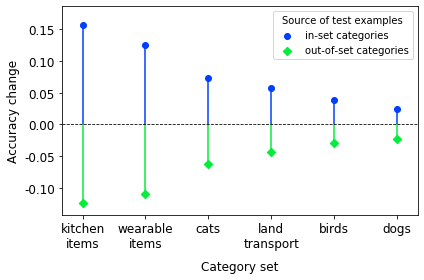

In [10]:
fig, ax = plot_change_acc(df_sem_sorted, range(len(df_sem_sorted)))
labels_sorted = list(df_sem_sorted['label'])
labels_sorted_plot = ['', 'kitchen\nitems', 'wearable\nitems', 'cats', 'land\ntransport', 'birds', 'dogs']
ax.set_xticklabels(labels_sorted_plot)
plt.xlabel('Category set', labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig(path_save/'sem_acc.pdf')
plt.show()

In [11]:
np.std(df_sem['acc_change_in'])

0.04733281561612179

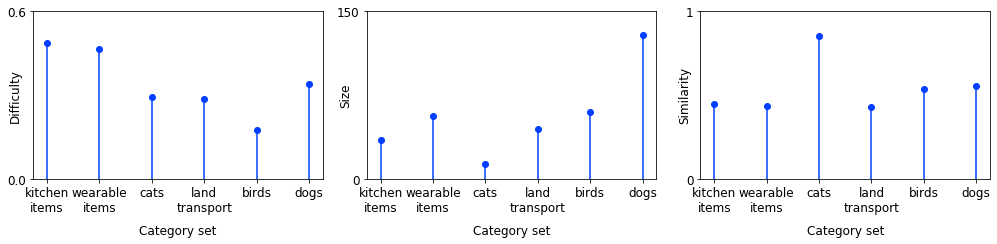

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3.5))

scatter_line(ax[1], range(len(df_sem_sorted)), df_sem_sorted['size'], styles['in'])
scatter_line(ax[0], range(len(df_sem_sorted)), 1-df_sem_sorted['acc_base_in'], styles['in'])
scatter_line(ax[2], range(len(df_sem_sorted)), df_sem_sorted['similarity'], styles['in'])

size_lims = (0, 150)
diff_lims = (0, 0.6)
sim_lims = (0, 1)

ax[1].set_ylabel('Size', labelpad=-15)
ax[1].set_yticks(size_lims)
ax[1].set_ylim(size_lims)
ax[0].set_ylabel('Difficulty', labelpad=-15)
ax[0].set_yticks(diff_lims)
ax[0].set_ylim(diff_lims)
ax[2].set_ylabel('Similarity', labelpad=-5)
ax[2].set_yticks(sim_lims)
ax[2].set_ylim(sim_lims)

for a in ax:
    a.set_xticklabels(labels_sorted_plot)
    a.set_xlabel('Category set', labelpad=10)
    
plt.tight_layout()
# plt.savefig(path_save/'sem_stats.pdf')
plt.show()

### Difficulty contexts

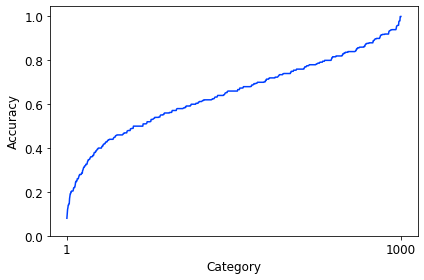

In [13]:
fig, ax = plt.subplots()
plt.plot(range(1000), sorted(df_baseline['accuracy']))
plt.xticks((0, 999))
ax.set_xticklabels((1, 1000))
# plt.ylim((0, 1))
plt.ylim(bottom=0)
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

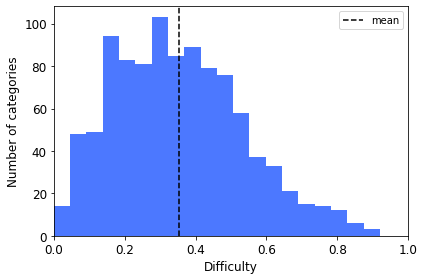

In [14]:
plt.hist(1-df_baseline['accuracy'], bins=20, alpha=0.7)
plt.axvline(np.mean(1-df_baseline['accuracy']), color='k', linestyle='--', label='mean')
plt.xlim((0, 1))
plt.xlabel('Difficulty')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df_diff = context_summary(type_context='diff', version_wnids=2, version_weights=3)

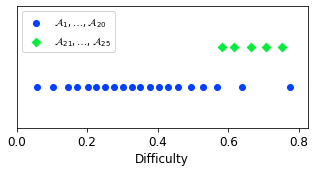

In [16]:
fig, ax = plt.subplots(figsize=(4.5, 2.5))
plt.scatter(
    1-df_diff['acc_base_in'][:20],
    np.ones(20),
    **styles['0'],
#     facecolors=c0, edgecolors=colors[0],
    label=r'$\mathcal{A}_1, \dots, \mathcal{A}_{20}$')
plt.scatter(
    1-df_diff['acc_base_in'][20:],
    2*np.ones(5),
    **styles['1'],
#     facecolors=c1, edgecolors=colors[1], marker=markers[1],
    label=r'$\mathcal{A}_{21}, \dots, \mathcal{A}_{25}$')
plt.xlim(left=0)
plt.ylim((0, 3))
plt.xlabel('Difficulty')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig(path_save/'diff_coverage.pdf')
plt.show()

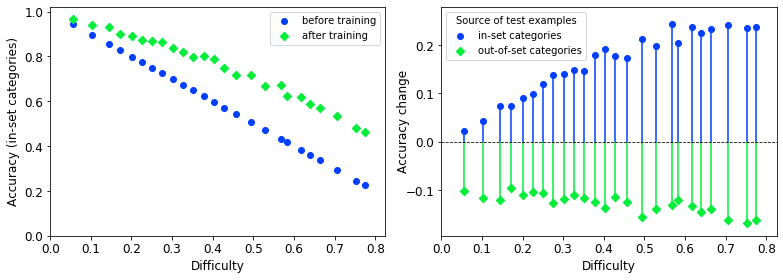

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

x = list(1-df_diff['acc_base_in'])

ax[0].scatter(x, df_diff['acc_base_in'], **styles['0'], label='before training')
ax[0].scatter(x, df_diff['acc_trained_in'], **styles['1'], label='after training')
scatter_line(ax[1], x, df_diff['acc_change_in'], styles['in'])
scatter_line(ax[1], x, df_diff['acc_change_out'], styles['out'])

ax[1].set_ylabel('Accuracy change', labelpad=-5)
ax[0].set_ylabel('Accuracy (in-set categories)')
ax[1].legend(title='Source of test examples')
ax[0].legend()
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[0].set_ylim(bottom=0)

for a in ax:
    a.set_xlabel('Difficulty')
    a.set_xlim(left=0)
    
plt.tight_layout()
# plt.savefig(path_save/'diff_acc.pdf')
plt.show()

### Size contexts

In [18]:
df_size_v6 = context_summary(type_context='size', version_wnids=4, version_weights=6).iloc[1:]
df_size_v6.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.471780,0.627551,0.646172,0.949495,0.586551,0.321944,-0.059621,300
2,4,0.460416,0.628451,0.646206,0.973545,0.517930,0.345094,-0.128276,300
3,8,0.402342,0.645502,0.646140,0.951872,0.387327,0.306370,-0.258814,300
4,16,0.382833,0.664092,0.645843,0.898417,0.444692,0.234324,-0.201151,174
5,32,0.424631,0.655852,0.645814,0.845651,0.469524,0.189798,-0.176290,137


In [19]:
df_size_v7 = context_summary(type_context='size', version_wnids=5, version_weights=7).iloc[1:]
df_size_v7.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.298697,0.670000,0.646087,0.940000,0.589368,0.270000,-0.056719,300
2,4,0.345680,0.620833,0.646237,0.956989,0.455257,0.336156,-0.190980,300
3,8,0.473047,0.659316,0.646029,0.945736,0.461182,0.286421,-0.184847,300
4,16,0.441069,0.657371,0.645952,0.886889,0.425643,0.229519,-0.220310,197
5,32,0.440449,0.658734,0.645719,0.847413,0.476740,0.188679,-0.168979,127


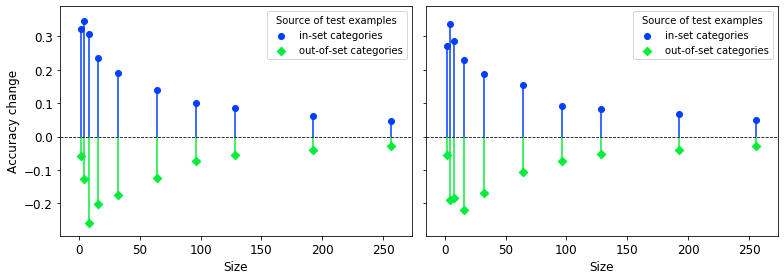

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(11, 4))

x = list(df_size_v6['size'])

scatter_line(ax[0], x, df_size_v6['acc_change_in'], styles['in'])
scatter_line(ax[0], x, df_size_v6['acc_change_out'], styles['out'])
scatter_line(ax[1], x, df_size_v7['acc_change_in'], styles['in'])
scatter_line(ax[1], x, df_size_v7['acc_change_out'], styles['out'])

ax[0].set_ylabel('Accuracy change')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

for a in ax:
    a.set_xlabel('Size')
    
plt.tight_layout()
# plt.savefig(path_save/'size_acc.pdf')
plt.show()

### Similarity contexts

In [21]:
df_sim_v3 = context_summary(type_context='sim', version_wnids=3, version_weights=3)
df_sim_v3.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.716746,0.600097,0.648558,0.760448,0.525034,0.160351,-0.123524,89
1,50,0.512130,0.611801,0.647942,0.802811,0.507715,0.191010,-0.140227,93
2,50,0.453881,0.648754,0.645997,0.802083,0.536498,0.153329,-0.109499,90
3,50,0.427748,0.674334,0.644651,0.832715,0.516972,0.158382,-0.127679,93
4,50,0.671111,0.686732,0.643998,0.800494,0.524112,0.113761,-0.119886,94


In [22]:
df_sim_v4 = context_summary(type_context='sim', version_wnids=4, version_weights=4)
df_sim_v4.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.719259,0.584325,0.649388,0.745228,0.510016,0.160903,-0.139373,88
1,50,0.568134,0.664104,0.645189,0.814936,0.521299,0.150832,-0.123891,94
2,50,0.489926,0.661631,0.645319,0.817018,0.512321,0.155387,-0.132999,99
3,50,0.425019,0.649648,0.645950,0.796205,0.519950,0.146557,-0.126000,98
4,50,0.811888,0.714175,0.642554,0.778363,0.572821,0.064188,-0.069733,74


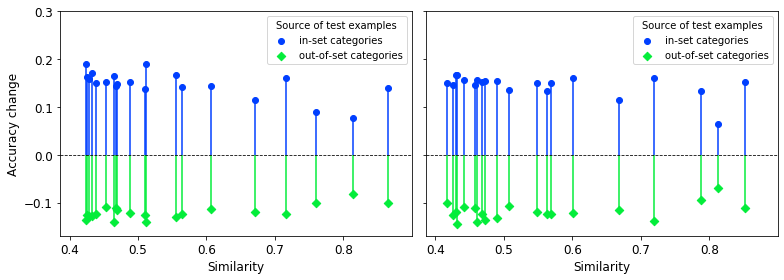

In [23]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(11, 4))

x3 = list(df_sim_v3['similarity'])
x4 = list(df_sim_v4['similarity'])

scatter_line(ax[0], x3, df_sim_v3['acc_change_in'], styles['in'])
scatter_line(ax[0], x3, df_sim_v3['acc_change_out'], styles['out'])
scatter_line(ax[1], x4, df_sim_v4['acc_change_in'], styles['in'])
scatter_line(ax[1], x4, df_sim_v4['acc_change_out'], styles['out'])

ax[0].set_ylabel('Accuracy change')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

for a in ax:
    a.set_xlabel('Similarity')
    a.set_ylim(top=0.3)
    
plt.tight_layout()
# plt.savefig(path_save/'sim_acc.pdf')
plt.show()

### Regression

In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def regression(x, y):
    x0 = np.array(x)[:, None]
    x1 = sm.add_constant(x0)
    y = np.array(y)[:, None]
    lr_skl = LinearRegression().fit(x0, y)
    lr_sm = sm.OLS(y, x1).fit()
    
    print('SKL: beta0, beta1, R2')
    print([round(a, 4) for a in [lr_skl.intercept_[0], lr_skl.coef_[0][0], lr_skl.score(x0, y)]])

    print('SM: beta0, beta1, R2')
    print([round(a, 4) for a in lr_sm.params], round(lr_sm.rsquared, 4))
    
    print('SM: p0, p1')
    print([f'{a:.5f}' for a in lr_sm.pvalues])
    
    return lr_sm

In [25]:
lr_diff = regression(
    x=1-df_diff['acc_base_in'],
    y=df_diff['acc_change_in'])
lr_diff.summary()

SKL: beta0, beta1, R2
[0.0373, 0.3026, 0.9162]
SM: beta0, beta1, R2
[0.0373, 0.3026] 0.9162
SM: p0, p1
['0.00033', '0.00000']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           7.14e-14
Time:                        18:30:43   Log-Likelihood:                 63.745
No. Observations:                  25   AIC:                            -123.5
Df Residuals:                      23   BIC:                            -121.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.009      4.214      0.000       0.019       0.056
x1             0.3026      0.019     15.854      0.000       0.263       0.342
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.477
Skew:                          -0.046   Prob(JB):                        0.788
Kurtosis:                       2.330   Cond. No.                         5.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lr_size = regression(
    x=np.log2(np.concatenate((df_size_v6['size'], df_size_v7['size']))),
    y=np.concatenate((df_size_v6['acc_change_in'], df_size_v7['acc_change_in'])))
lr_size.summary()

SKL: beta0, beta1, R2
[0.3945, -0.0429, 0.9371]
SM: beta0, beta1, R2
[0.3945, -0.0429] 0.9371
SM: p0, p1
['0.00000', '0.00000']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     268.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.96e-12
Time:                        18:30:43   Log-Likelihood:                 44.906
No. Observations:                  20   AIC:                            -85.81
Df Residuals:                      18   BIC:                            -83.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3945      0.014     27.285      0.000       0.364       0.425
x1            -0.0429      0.003    -16.371      0.000      -0.048      -0.037
==============================================================================
Omnibus:                       13.171   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.470
Skew:                          -1.289   Prob(JB):                      0.00196
Kurtosis:                       5.885   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lr_sim = regression(
    x=np.concatenate((df_sim_v3['similarity'], df_sim_v4['similarity'])),
    y=np.concatenate((df_sim_v3['acc_change_in'], df_sim_v4['acc_change_in'])))
lr_sim.summary()

SKL: beta0, beta1, R2
[0.2087, -0.1119, 0.3656]
SM: beta0, beta1, R2
[0.2087, -0.1119] 0.3656
SM: p0, p1
['0.00000', '0.00004']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     21.90
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           3.59e-05
Time:                        18:30:43   Log-Likelihood:                 99.727
No. Observations:                  40   AIC:                            -195.5
Df Residuals:                      38   BIC:                            -192.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2087      0.014     15.284      0.000       0.181       0.236
x1            -0.1119      0.024     -4.680      0.000      -0.160      -0.063
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.283
Skew:                          -0.122   Prob(JB):                        0.868
Kurtosis:                       3.332   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
def plot_regression(ax, x, ytrue, model):
    xminmax = [min(x), max(x)]
    ypred = model.predict(sm.add_constant(xminmax)[:, None])
    ax.scatter(x, ytrue, color=colors[0])
    ax.plot(xminmax, ypred, '-', color=colors[1], label='least-squares')
    return ax

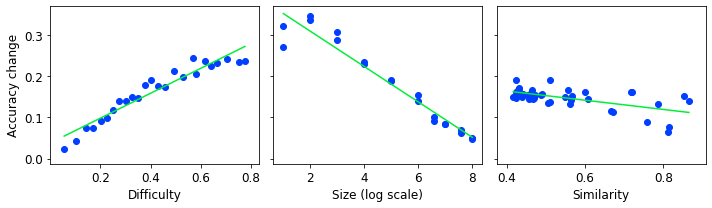

In [29]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

ax[0] = plot_regression(
    ax[0],
    x=list(1-df_diff['acc_base_in']),
    ytrue=df_diff['acc_change_in'],
    model=lr_diff)
ax[0].set_xlabel('Difficulty')
ax[0].set_ylabel('Accuracy change')

ax[1] = plot_regression(
    ax[1],
    x=np.log2(np.concatenate((df_size_v6['size'], df_size_v7['size']))),
    ytrue=np.concatenate((df_size_v6['acc_change_in'], df_size_v7['acc_change_in'])),
    model=lr_size)
ax[1].set_xlabel('Size (log scale)')

ax[2] = plot_regression(
    ax[2],
    x=np.concatenate((df_sim_v3['similarity'], df_sim_v4['similarity'])),
    ytrue=np.concatenate((df_sim_v3['acc_change_in'], df_sim_v4['acc_change_in'])),
    model=lr_sim)
ax[2].set_xlabel('Similarity')

plt.tight_layout()
# plt.savefig(path_save/'regression.pdf')
plt.show()